In [80]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

In [81]:
x_train = np.array([18, 20, 22, 24, 26, 28, 30, 32, 34, 36])
y_train = np.array([50, 55, 65, 75, 85, 120, 150, 170, 200, 220])

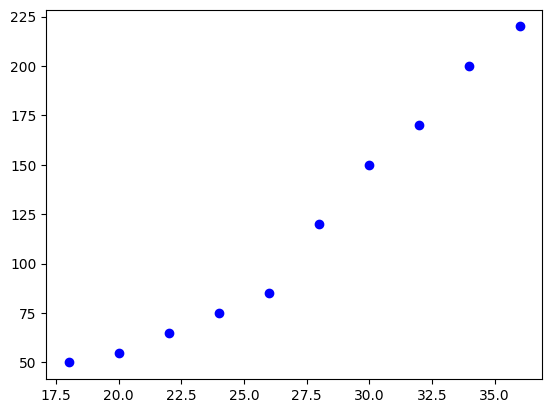

In [82]:
plt.scatter(
    x_train,
    y_train,
    c="blue"
)
plt.show()

In [83]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost_sum = 0
    total_cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum += cost
    total_cost = cost_sum/(2*m)

    return total_cost


In [84]:
initial_w = 0
initial_b = 0

cost_f = compute_cost(x_train, y_train, initial_w, initial_b)
print("cost function initial : ",cost_f)

cost function initial :  8840.0


In [85]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [86]:
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print("Gradient initial w, b : ", tmp_dj_dw, tmp_dj_db)

Gradient initial w, b :  -3546.0 -119.0


In [107]:
def gradient_descent(x, y, w_init, b_init, cost_f, gradient_f, alpha, iter):
    m = x.shape[0]
    w = copy.deepcopy(w_init)
    b = b_init
    j_history = []
    w_history = []
    
    for i in range(1, iter+1):
        dj_dw, dj_db = gradient_f(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i<1000000:
            cost = cost_f(x, y, w, b)
            j_history.append(cost)

        if i% math.ceil(iter/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(j_history[-1]):8.2f}")

    return w, b, j_history, w_history

In [116]:
initial_w = 0
initial_b = 0
iterations = 150000
alpha = 0.001

w, b, _, _ = gradient_descent(
    x_train,
    y_train, 
    initial_w, 
    initial_b, 
    compute_cost, 
    compute_gradient, 
    alpha, 
    iterations
)
print("w, b after gradient descent: ", w, b)

Iteration 15000: Cost   218.96
Iteration 30000: Cost   117.50
Iteration 45000: Cost    89.78
Iteration 60000: Cost    82.21
Iteration 75000: Cost    80.14
Iteration 90000: Cost    79.58
Iteration 105000: Cost    79.42
Iteration 120000: Cost    79.38
Iteration 135000: Cost    79.37
Iteration 150000: Cost    79.36
w, b after gradient descent:  10.082626779459499 -153.22081348818998


In [118]:
m = x_train.shape[0]
y_hat = np.zeros(m)

for i in range(m):
    y_hat[i] = w * x_train[i] + b

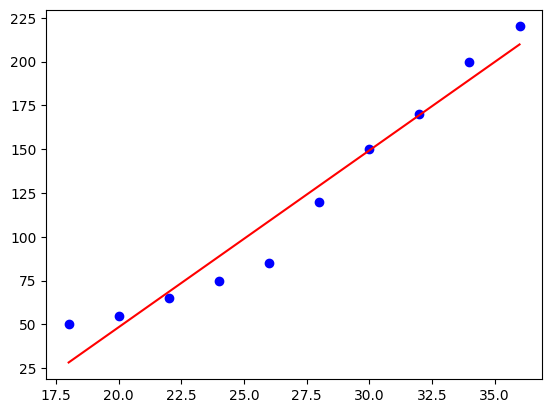

In [120]:
plt.plot(x_train, y_hat, c="red")
plt.scatter(x_train, y_train, c="blue")
plt.show()

In [134]:
x_predict = np.array([42, 29, 17])
m = x_predict.shape[0]

for i in range(m):
    y_hat = x_predict[i] * w + b
    print("If the temperature is {} degrees Celsius, then the predicted ice cream sales are {} units".format(x_predict[i], int(y_hat)))

If the temperature is 42 degrees Celsius, then the predicted ice cream sales are 270 units
If the temperature is 29 degrees Celsius, then the predicted ice cream sales are 139 units
If the temperature is 17 degrees Celsius, then the predicted ice cream sales are 18 units
